# CAR PRICE PREDICTION

## EDA

1. INITIAL DATA UNDERSTANDING

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('avito_car_dataset_ALL.csv', encoding="latin1")
data.head(15)

,Unnamed: 0,Lien,Ville,Secteur,Marque,Modèle,Année-Modèle,Kilométrage,Type de carburant,Puissance fiscale,...,Caméra de recul,Vitres électriques,ABS,ESP,Régulateur de vitesse,Limiteur de vitesse,CD/MP3/Bluetooth,Ordinateur de bord,Verrouillage centralisé à distance,Prix
0,0,https://www.avito.ma/fr/massira_2/voitures/FIA...,Temara,Massira 2,Fiat,Punto,2007,200 000 - 249 999,Diesel,5,...,False,False,True,False,False,False,True,False,False,60000
1,1,https://www.avito.ma/fr/temara/voitures/Dacia_...,Temara,NaN,Dacia,Dokker Van,2013,400 000 - 449 999,Diesel,6,...,False,False,False,False,False,False,False,False,False,70000
2,2,https://www.avito.ma/fr/casablanca/voitures/Da...,Casablanca,NaN,Dacia,Dokker,2014,160 000 - 169 999,Diesel,6,...,False,False,False,False,False,False,False,False,False,90000
3,3,https://www.avito.ma/fr/casablanca/voitures/to...,Casablanca,NaN,Volkswagen,Touareg,2005,0 - 4 999,Diesel,10,...,False,False,False,False,False,False,False,False,False,90000
4,4,https://www.avito.ma/fr/dakhla/voitures/Toyota...,Dakhla,NaN,Toyota,Prado,2007,200 000 - 249 999,Diesel,12,...,False,False,True,False,False,False,True,False,False,97000
5,5,https://www.avito.ma/fr/khouribga/voitures/Tig...,Khouribga,Toute la ville,Volkswagen,Tiguan,2014,180 000 - 189 999,Diesel,8,...,False,False,True,True,False,False,True,False,False,255000
6,6,https://www.avito.ma/fr/autre_secteur/voitures...,Meknès,Autre secteur,Peugeot,308,2009,200 000 - 249 999,Diesel,6,...,False,False,True,True,False,False,True,False,False,85000
7,7,https://www.avito.ma/fr/casablanca/voitures/Re...,Casablanca,NaN,Renault,Clio,2014,75 000 - 79 999,Diesel,6,...,False,False,True,True,False,False,True,False,False,93000
8,8,https://www.avito.ma/fr/mohammedia/voitures/Pe...,Mohammedia,NaN,Peugeot,208,2021,10 000 - 14 999,Diesel,6,...,False,False,True,True,False,False,True,False,False,164000
9,9,https://www.avito.ma/fr/fquih_ben_saleh/voitur...,Fquih Ben Saleh,NaN,Volkswagen,GOLF 7,2013,120 000 - 129 999,Diesel,8,...,False,False,True,True,False,False,True,False,False,198000


In [3]:
data.shape

(24776, 32)

In [4]:
# Check missing values 
data.isna().sum(axis=0)

Unnamed: 0                                0
Lien                                      0
Ville                                     0
Secteur                               13966
Marque                                    0
Modèle                                    0
Année-Modèle                              0
Kilométrage                               0
Type de carburant                         0
Puissance fiscale                         0
Boite de vitesses                         0
Nombre de portes                       4380
Origine                                5287
Première main                          6209
État                                   6678
Jantes aluminium                          0
Airbags                                   0
Climatisation                             0
Système de navigation/GPS                 0
Toit ouvrant                              0
Sièges cuir                               0
Radar de recul                            0
Caméra de recul                 

In [5]:
# Duplicated values
data.duplicated().sum()

np.int64(0)

2. BASIC STATISTICAL OVERVIEW :

In [6]:
data.describe()

,Unnamed: 0,Année-Modèle,Puissance fiscale,Nombre de portes,Prix
count,24776.000000,24776.000000,24776.000000,20396.000000,2.477600e+04
mean,12387.500000,2011.844244,7.193938,4.905766,2.169588e+05
std,7152.359471,5.462925,1.574124,0.423789,6.749569e+06
min,0.000000,1990.000000,5.000000,3.000000,6.000000e+04
25%,6193.750000,2008.000000,6.000000,5.000000,7.500000e+04
50%,12387.500000,2013.000000,7.000000,5.000000,1.000000e+05
75%,18581.250000,2016.000000,8.000000,5.000000,1.400000e+05
max,24775.000000,2022.000000,14.000000,5.000000,6.120372e+08


In [7]:
data.select_dtypes(include='object').describe()

,Lien,Ville,Secteur,Marque,Modèle,Kilométrage,Type de carburant,Boite de vitesses,Origine,Première main,État
count,24776,24776,10810,24776,24776,24776,24776,24776,19489,18567,18098
unique,8230,191,401,23,369,36,4,3,4,2,6
top,https://www.avito.ma/fr/jorf_el_melha/voitures...,Casablanca,Toute la ville,Volkswagen,Kangoo,200 000 - 249 999,Diesel,Manuelle,WW au Maroc,Non,Excellent
freq,4,6270,1725,3503,1213,2760,22618,17452,14574,11788,8761


In [8]:
data.drop(columns=["Unnamed: 0" ,"Lien", "Secteur", "Nombre de portes", "Première main", "Origine", "Jantes aluminium", "Toit ouvrant", "Sièges cuir", "Caméra de recul", "Vitres électriques", "Régulateur de vitesse", "Limiteur de vitesse", "Verrouillage centralisé à distance"], inplace=True)

In [9]:
data.shape

(24776, 18)

In [10]:
# Fix the kilometrage values

def convert_kilometrage(value):
    try:
        numbers = [int(num.replace(" ", "")) for num in value.split("-")]
        return np.mean(numbers)
    except:
        return np.nan  # Handle cases where the value is not a valid range

# Apply transformation
data["Kilométrage"] = data["Kilométrage"].astype(str).apply(convert_kilometrage)

# Display the first few rows to check the result
data[["Kilométrage"]]

,Kilométrage
0,224999.5
1,424999.5
2,164999.5
3,2499.5
4,224999.5
...,...
24771,72499.5
24772,194999.5
24773,12499.5
24774,144999.5


In [11]:
data['Marque'].value_counts()

Marque
Volkswagen       3503
Renault          3406
Dacia            3009
Peugeot          1977
Mercedes-Benz    1953
Ford             1617
Hyundai          1593
Citroen          1174
Fiat             1070
Toyota            908
Audi              763
BMW               588
Opel              584
Nissan            532
Kia               491
Skoda             365
Seat              333
Land Rover        312
Jeep              202
Alfa Romeo        130
Chevrolet          91
mini               88
Suzuki             87
Name: count, dtype: int64

In [12]:
data.dtypes

Ville                         object
Marque                        object
Modèle                        object
Année-Modèle                   int64
Kilométrage                  float64
Type de carburant             object
Puissance fiscale              int64
Boite de vitesses             object
État                          object
Airbags                         bool
Climatisation                   bool
Système de navigation/GPS       bool
Radar de recul                  bool
ABS                             bool
ESP                             bool
CD/MP3/Bluetooth                bool
Ordinateur de bord              bool
Prix                           int64
dtype: object

In [13]:
data['État'].value_counts()

État
Excellent      8761
Très bon       7402
Bon            1833
Correct          90
Pour Pièces       9
Endommagé         3
Name: count, dtype: int64

In [14]:
data['Boite de vitesses'].value_counts()

Boite de vitesses
Manuelle       17452
Automatique     4418
--              2906
Name: count, dtype: int64

In [15]:
data['Type de carburant'].value_counts()

Type de carburant
Diesel        22618
Essence        2122
Hybride          18
Electrique       18
Name: count, dtype: int64

In [16]:
data['Boite de vitesses'] = data['Boite de vitesses'].replace('--', np.nan)

FIX MISSING VALUES

In [17]:
data['État'].fillna(data['État'].mode()[0], inplace=True)

data['Boite de vitesses'].fillna(data['Boite de vitesses'].mode()[0], inplace=True)

C:\Users\Aymane\AppData\Local\Temp\ipykernel_12556\645542188.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['État'].fillna(data['État'].mode()[0], inplace=True)
C:\Users\Aymane\AppData\Local\Temp\ipykernel_12556\645542188.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [18]:
data.isna().sum(axis=0)

Ville                        0
Marque                       0
Modèle                       0
Année-Modèle                 0
Kilométrage                  0
Type de carburant            0
Puissance fiscale            0
Boite de vitesses            0
État                         0
Airbags                      0
Climatisation                0
Système de navigation/GPS    0
Radar de recul               0
ABS                          0
ESP                          0
CD/MP3/Bluetooth             0
Ordinateur de bord           0
Prix                         0
dtype: int64

In [19]:
data.shape

(24776, 18)

In [20]:
data.select_dtypes(include='object').describe()

,Ville,Marque,Modèle,Type de carburant,Boite de vitesses,État
count,24776,24776,24776,24776,24776,24776
unique,191,23,369,4,2,6
top,Casablanca,Volkswagen,Kangoo,Diesel,Manuelle,Excellent
freq,6270,3503,1213,22618,20358,15439


3. Distribution of Variables

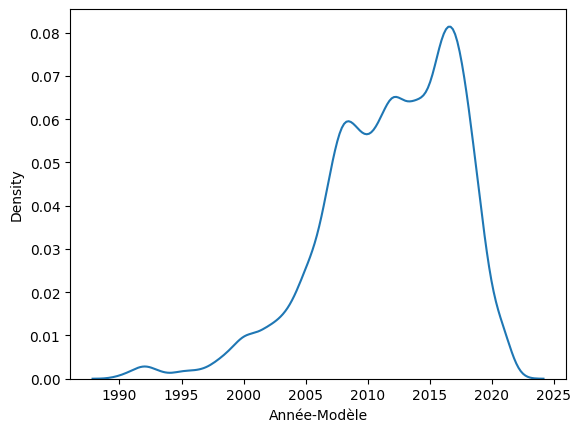

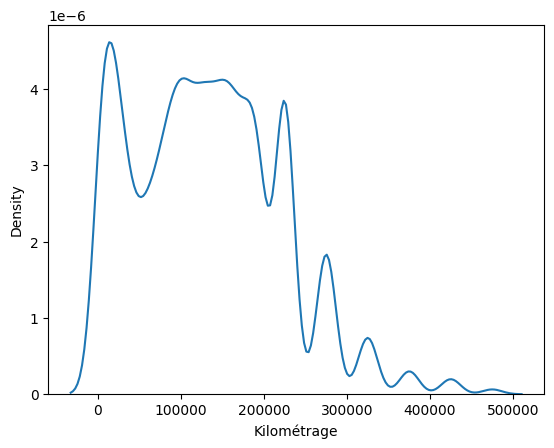

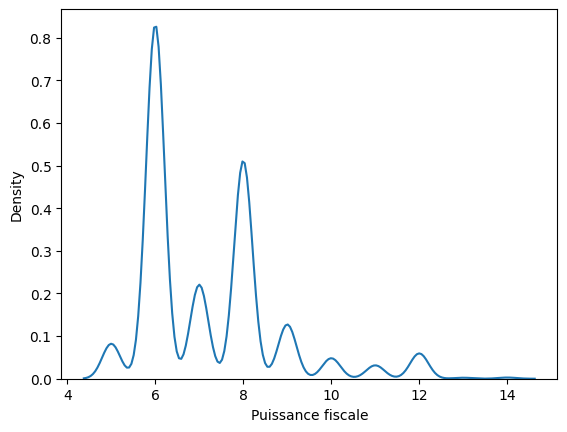

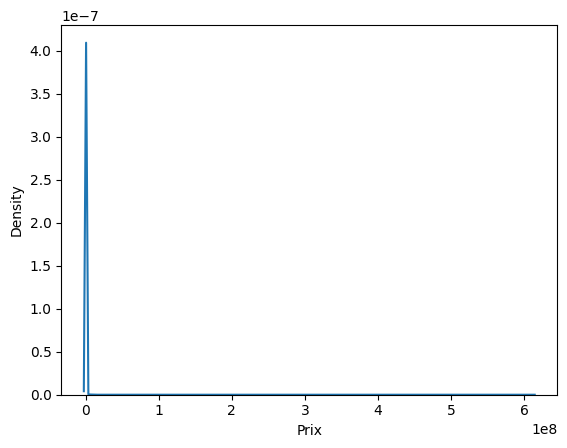

In [21]:
for col in data.select_dtypes('number').columns:
    sns.kdeplot(data[col])
    plt.show()

ONE HOT ENCODING

In [22]:
data = pd.get_dummies(data, columns=['Boite de vitesses', 'Type de carburant'])

LABEL ENCODING

In [23]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
label_columns = ['État', 'Marque', 'Ville', 'Modèle']

for column in label_columns:
    data[column] = encoder.fit_transform(data[column])

In [24]:
bool_cols = data.select_dtypes(include=bool).columns  # Select only boolean columns
data[bool_cols] = data[bool_cols].astype(int)

In [25]:
data

,Ville,Marque,Modèle,Année-Modèle,Kilométrage,Puissance fiscale,État,Airbags,Climatisation,Système de navigation/GPS,...,ESP,CD/MP3/Bluetooth,Ordinateur de bord,Prix,Boite de vitesses_Automatique,Boite de vitesses_Manuelle,Type de carburant_Diesel,Type de carburant_Electrique,Type de carburant_Essence,Type de carburant_Hybride
0,176,6,272,2007,224999.5,5,5,0,1,0,...,0,1,0,60000,0,1,1,0,0,0
1,176,5,159,2013,424999.5,6,3,0,0,0,...,0,0,0,70000,0,1,1,0,0,0
2,44,5,158,2014,164999.5,6,5,0,0,0,...,0,0,0,90000,0,1,1,0,0,0
3,44,21,331,2005,2499.5,10,3,0,0,0,...,0,0,0,90000,1,0,1,0,0,0
4,47,20,270,2007,224999.5,12,3,1,0,0,...,0,1,0,97000,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24771,97,22,359,2011,72499.5,9,3,1,1,0,...,1,0,0,180000,0,1,0,0,1,0
24772,132,22,360,2007,194999.5,9,5,1,1,0,...,1,1,0,63000,0,1,0,0,1,0
24773,134,22,368,2006,12499.5,8,3,1,1,0,...,0,1,0,60000,0,1,0,0,1,0
24774,44,22,360,2010,144999.5,9,5,1,1,0,...,1,1,0,85000,1,0,0,0,1,0


HANDLING OUTLIERS

<Axes: ylabel='Prix'>

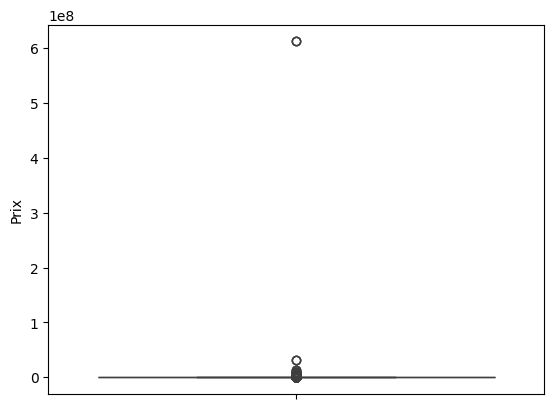

In [26]:
sns.boxplot(data['Prix'])

<Axes: ylabel='Puissance fiscale'>

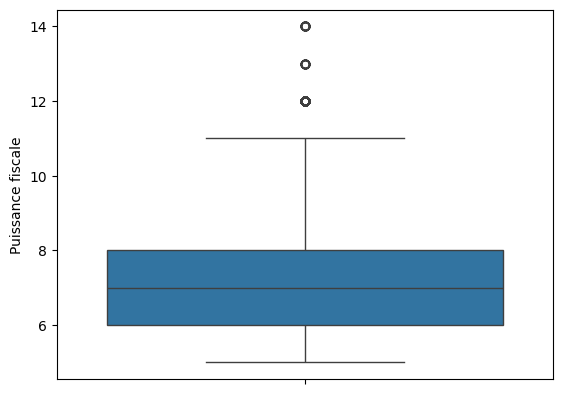

In [27]:
sns.boxplot(data['Puissance fiscale'])

<Axes: ylabel='Kilométrage'>

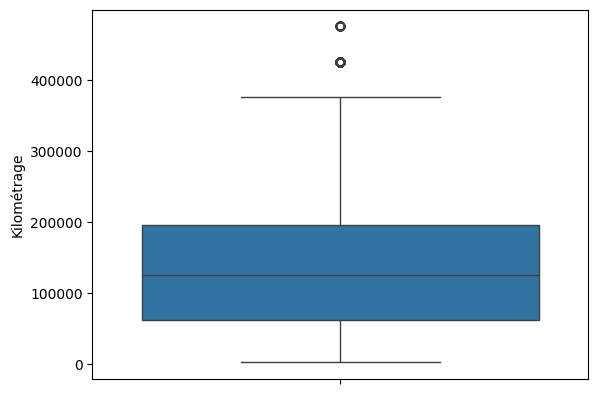

In [28]:
sns.boxplot(data['Kilométrage'])

In [29]:
def clean_outliers(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    df_no_outliers = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return df_no_outliers

In [30]:
data = clean_outliers(data, 'Prix')
data = clean_outliers(data, 'Puissance fiscale')


CORRELATION

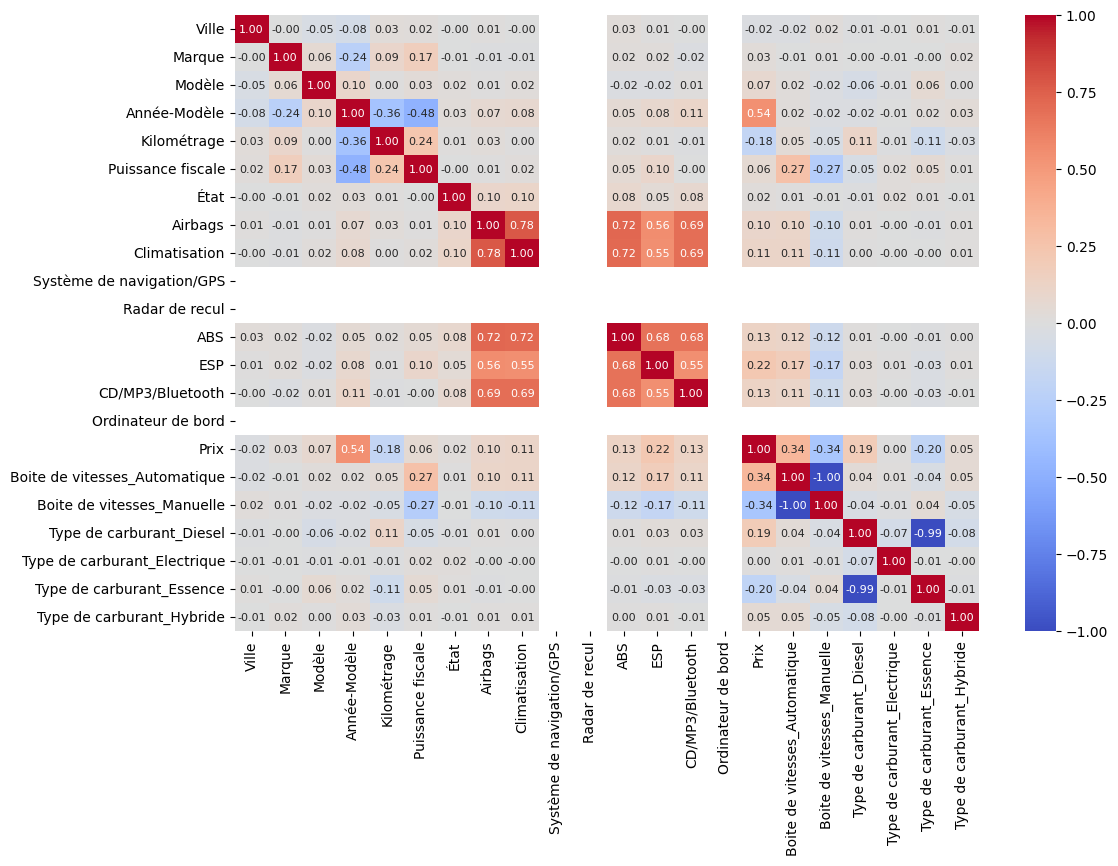

In [31]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 8})
plt.show()

## TRAINING 

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = data.drop('Prix', axis=1)
y = data['Prix']


In [34]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

Train set: 15625 samples
Validation set: 3348 samples
Test set: 3349 samples


SCALING

In [35]:
data

,Ville,Marque,Modèle,Année-Modèle,Kilométrage,Puissance fiscale,État,Airbags,Climatisation,Système de navigation/GPS,...,ESP,CD/MP3/Bluetooth,Ordinateur de bord,Prix,Boite de vitesses_Automatique,Boite de vitesses_Manuelle,Type de carburant_Diesel,Type de carburant_Electrique,Type de carburant_Essence,Type de carburant_Hybride
0,176,6,272,2007,224999.5,5,5,0,1,0,...,0,1,0,60000,0,1,1,0,0,0
1,176,5,159,2013,424999.5,6,3,0,0,0,...,0,0,0,70000,0,1,1,0,0,0
2,44,5,158,2014,164999.5,6,5,0,0,0,...,0,0,0,90000,0,1,1,0,0,0
3,44,21,331,2005,2499.5,10,3,0,0,0,...,0,0,0,90000,1,0,1,0,0,0
6,103,15,36,2009,224999.5,6,3,1,1,0,...,1,1,0,85000,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24771,97,22,359,2011,72499.5,9,3,1,1,0,...,1,0,0,180000,0,1,0,0,1,0
24772,132,22,360,2007,194999.5,9,5,1,1,0,...,1,1,0,63000,0,1,0,0,1,0
24773,134,22,368,2006,12499.5,8,3,1,1,0,...,0,1,0,60000,0,1,0,0,1,0
24774,44,22,360,2010,144999.5,9,5,1,1,0,...,1,1,0,85000,1,0,0,0,1,0


SCALING

In [36]:
from sklearn.discriminant_analysis import StandardScaler


numerical_columns = ['Année-Modèle', 'Kilométrage', 'Puissance fiscale']

scaler = StandardScaler()
X_train[numerical_columns]= scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

LINEAR REGRESSION

In [37]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
from sklearn.metrics import root_mean_squared_error, r2_score

y_val_pred = lr.predict(X_val)
rmse = root_mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Root Mean Squared Error: 26068.58061311845
R^2 Score: 0.5572774758334573


RANDOM FOREST

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_val_pred = rf.predict(X_val)
rmse = root_mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Root Mean Squared Error: 6129.837472929695
R^2 Score: 0.9755209383051981
